## Name :  Yati Maheshwari
## Task-3:Fake buyer Identification System:
### EDA Report Generate below input value(1 to 5)using Test Data file(Yoshops.com Sale Order file)
### Input value for generate PDF and CSV file:

Import the relevant libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# load order dataset
order_data =pd.read_csv('orders_2020_2021_DataSet_Updated.csv')
df = order_data.copy()
print(df.shape)
df.head(5)

(3040, 38)


,Order #,Fulfillment Date and Time Stamp,Currency,Subtotal,Shipping Method,Shipping Cost,Tax Method,Taxes,Total,Coupon Code,...,Tracking #,Special Instructions,LineItem Name,LineItem SKU,LineItem Options,LineItem Add-ons,LineItem Qty,LineItem Sale Price,Download Status,LineItem Type
0,R121113121,NaN,INR,"₹ 2,299.00",Ships Free,₹ 0.00,NaN,₹ 0.00,"₹ 2,299.00",NaN,...,NaN,NaN,Falcon Drone Four Axis Aircraft with 2.4 GHz R...,PL0093416,NaN,NaN,1,"₹ 2,299.00",NaN,physical
1,R472890631,NaN,INR,"₹ 2,299.00",Ships Free,₹ 0.00,NaN,₹ 0.00,"₹ 2,299.00",NaN,...,NaN,NaN,Falcon Drone Four Axis Aircraft with 2.4 GHz R...,PL0093416,NaN,NaN,1,"₹ 2,299.00",NaN,physical
2,R004476488,NaN,INR,"₹ 2,299.00",Ships Free,₹ 0.00,NaN,₹ 0.00,"₹ 2,299.00",NaN,...,NaN,NaN,Falcon Drone Four Axis Aircraft with 2.4 GHz R...,PL0093416,NaN,NaN,1,"₹ 2,299.00",NaN,physical
3,R526038353,NaN,INR,"₹ 2,299.00",Ships Free,₹ 0.00,NaN,₹ 0.00,"₹ 2,299.00",NaN,...,NaN,NaN,Falcon Drone Four Axis Aircraft with 2.4 GHz R...,PL0093416,NaN,NaN,1,"₹ 2,299.00",NaN,physical
4,R658530771,NaN,INR,₹ 349.00,Ships Free,₹ 0.00,NaN,₹ 0.00,₹ 349.00,NaN,...,NaN,NaN,Barbie Doll (pink),PL00098,NaN,NaN,1,₹ 349.00,NaN,physical


## 1.The shipping address differs from the billing address.

In [4]:
# Combine all billing and shipping columns and make two columns for billing and shipping address
df['Billing Address'] = df['Billing Name'].astype(str) +","+ df['Billing Street Address'].astype(str) + ","+ df['Billing Street Address 2'].astype(str) + ","+df['Billing City'].astype(str) +"," + df['Billing State'].astype(str)+"," +df['Billing Country'].astype(str) + "," + df['Billing Zip'].astype(str)
df['Shipping Address'] = df['Shipping Name'].astype(str) +","+ df['Shipping Street Address'].astype(str) + ","+ df['Shipping Street Address 2'].astype(str) + ","+df['Shipping City'].astype(str) +"," + df['Shipping State'].astype(str)+"," +df['Shipping Country'].astype(str) + "," + df['Shipping Zip'].astype(str)
col = ['Billing Address','Shipping Address']
df_ship__bill = df[col]
# Compare both address that both are equal or not
df_ship__bill['different address'] = np.where((df_ship__bill['Billing Address'] == df_ship__bill['Shipping Address']),df_ship__bill['Shipping Address'],np.nan)
new_df = df_ship__bill[df_ship__bill['different address'].isnull()]
new_df = new_df[new_df['Billing Address'] != 'nan,nan,nan,nan,nan,nan,nan']
new_df = new_df.reset_index().drop(columns='different address',axis=1)
new_df


C:\Users\yatim\AppData\Local\Temp\ipykernel_15716\1080670635.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ship__bill['different address'] = np.where((df_ship__bill['Billing Address'] == df_ship__bill['Shipping Address']),df_ship__bill['Shipping Address'],np.nan)


,index,Billing Address,Shipping Address
0,432,"Sanjay Nalagampalli,24/45,#401 Krishna Towers,...","Sanjay Nalagampalli,Sri Lakshmi vallaba landma..."
1,749,"Umar Malik,88/111,Malik house,Allahabad,IN-UP,...","Samvet Kumar,959 shivpuri Marg allahapur,nan,A..."
2,1054,"Brajendra Padhi,Gayatri Bhawan,Siddha Mahavir ...","Brajendra Padhi,Gayatri Bhawan,Just left side ..."
3,1722,"Sharath Gowda,Ramkrishna building near Swamy h...","Sharath Gowda,Konappana Agrahara Electronic ci..."
4,1891,"Harshvardhan Jha,3rd cross road, prashant layo...","Dr. R C Jha,D1 Suryatoran Apartment,J C MULLIC..."
5,2218,"Sasikala Ematchandirane,93 east bluff road,nan...","Sivabakiyam Duraivelu,33,Thiagumudaliar nagar,..."
6,2389,"Sanjeev Yadav,Hno 124 kh Raj Internet cafe,Lah...","Urmila Kirar,Hno 124 kh Raj Internet cafe,Laho..."
7,2608,"Jeyarajan D,BKP 3RD ST,ADAMBAKKAM,18G4,CHENNAI...","Bahesri Jeyarajan,Pioneer Kumarasay Nagar,NGO ..."
8,2813,"prabeen patra,Old No-16 D,New No-34, Soundares...","Yashasin pwc,Chennai Smart City Limited,Wing A..."
9,2827,"Sadashiv Chavhan,Gat No. 55, Plot No. 30,Opp. ...","Avinash shamsundar Patil,At - Manur kh., Post ..."


In [5]:
# Create CSV file for different billing and shipping address
new_df.to_csv('Different_billing_and_shipping_address.csv')

## 2.Multiple orders of the same item.

In [6]:
df.columns.values

array(['Order #', 'Fulfillment Date and Time Stamp', 'Currency',
       'Subtotal', 'Shipping Method', 'Shipping Cost', 'Tax Method',
       'Taxes', 'Total', 'Coupon Code', 'Coupon Code Name', 'Discount',
       'Billing Name', 'Billing Country', 'Billing Street Address',
       'Billing Street Address 2', 'Billing City', 'Billing State',
       'Billing Zip', 'Shipping Name', 'Shipping Country',
       'Shipping Street Address', 'Shipping Street Address 2',
       'Shipping City', 'Shipping State', 'Shipping Zip', 'Gift Cards',
       'Payment Method', 'Tracking #', 'Special Instructions',
       'LineItem Name', 'LineItem SKU', 'LineItem Options',
       'LineItem Add-ons', 'LineItem Qty', 'LineItem Sale Price',
       'Download Status', 'LineItem Type'], dtype=object)

In [4]:
# Create new column for number of order associated their name
colm = ['LineItem Name']
df_mul_ord = df[colm]
x = df_mul_ord['LineItem Name'].value_counts().to_dict()
df_mul_ord['Total Order'] = df_mul_ord['LineItem Name'].map(x)
df_mul_ord =  df_mul_ord.drop_duplicates()
df_mul_ord

C:\Users\yatim\AppData\Local\Temp\ipykernel_22892\3148251713.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mul_ord['Total Order'] = df_mul_ord['LineItem Name'].map(x)


,LineItem Name,Total Order
0,Falcon Drone Four Axis Aircraft with 2.4 GHz R...,7
4,Barbie Doll (pink),81
5,Sony MDR-G45LP On-Ear Street Wired Headphone,18
6,Reliance Jio Phone 2,95
8,QUECHUA Ultra Compact Travel 10 Litre Backpack...,11
...,...,...
3005,iBall Excelance CompBook 11.6-inch Laptop,5
3007,Ear Wired Earphones With Mic White,11
3019,Electric Steam Cooker Maestro MC1,5
3020,"AmbranePowerBank P-1111(white,Blue)",1


<Axes: ylabel='LineItem Name'>

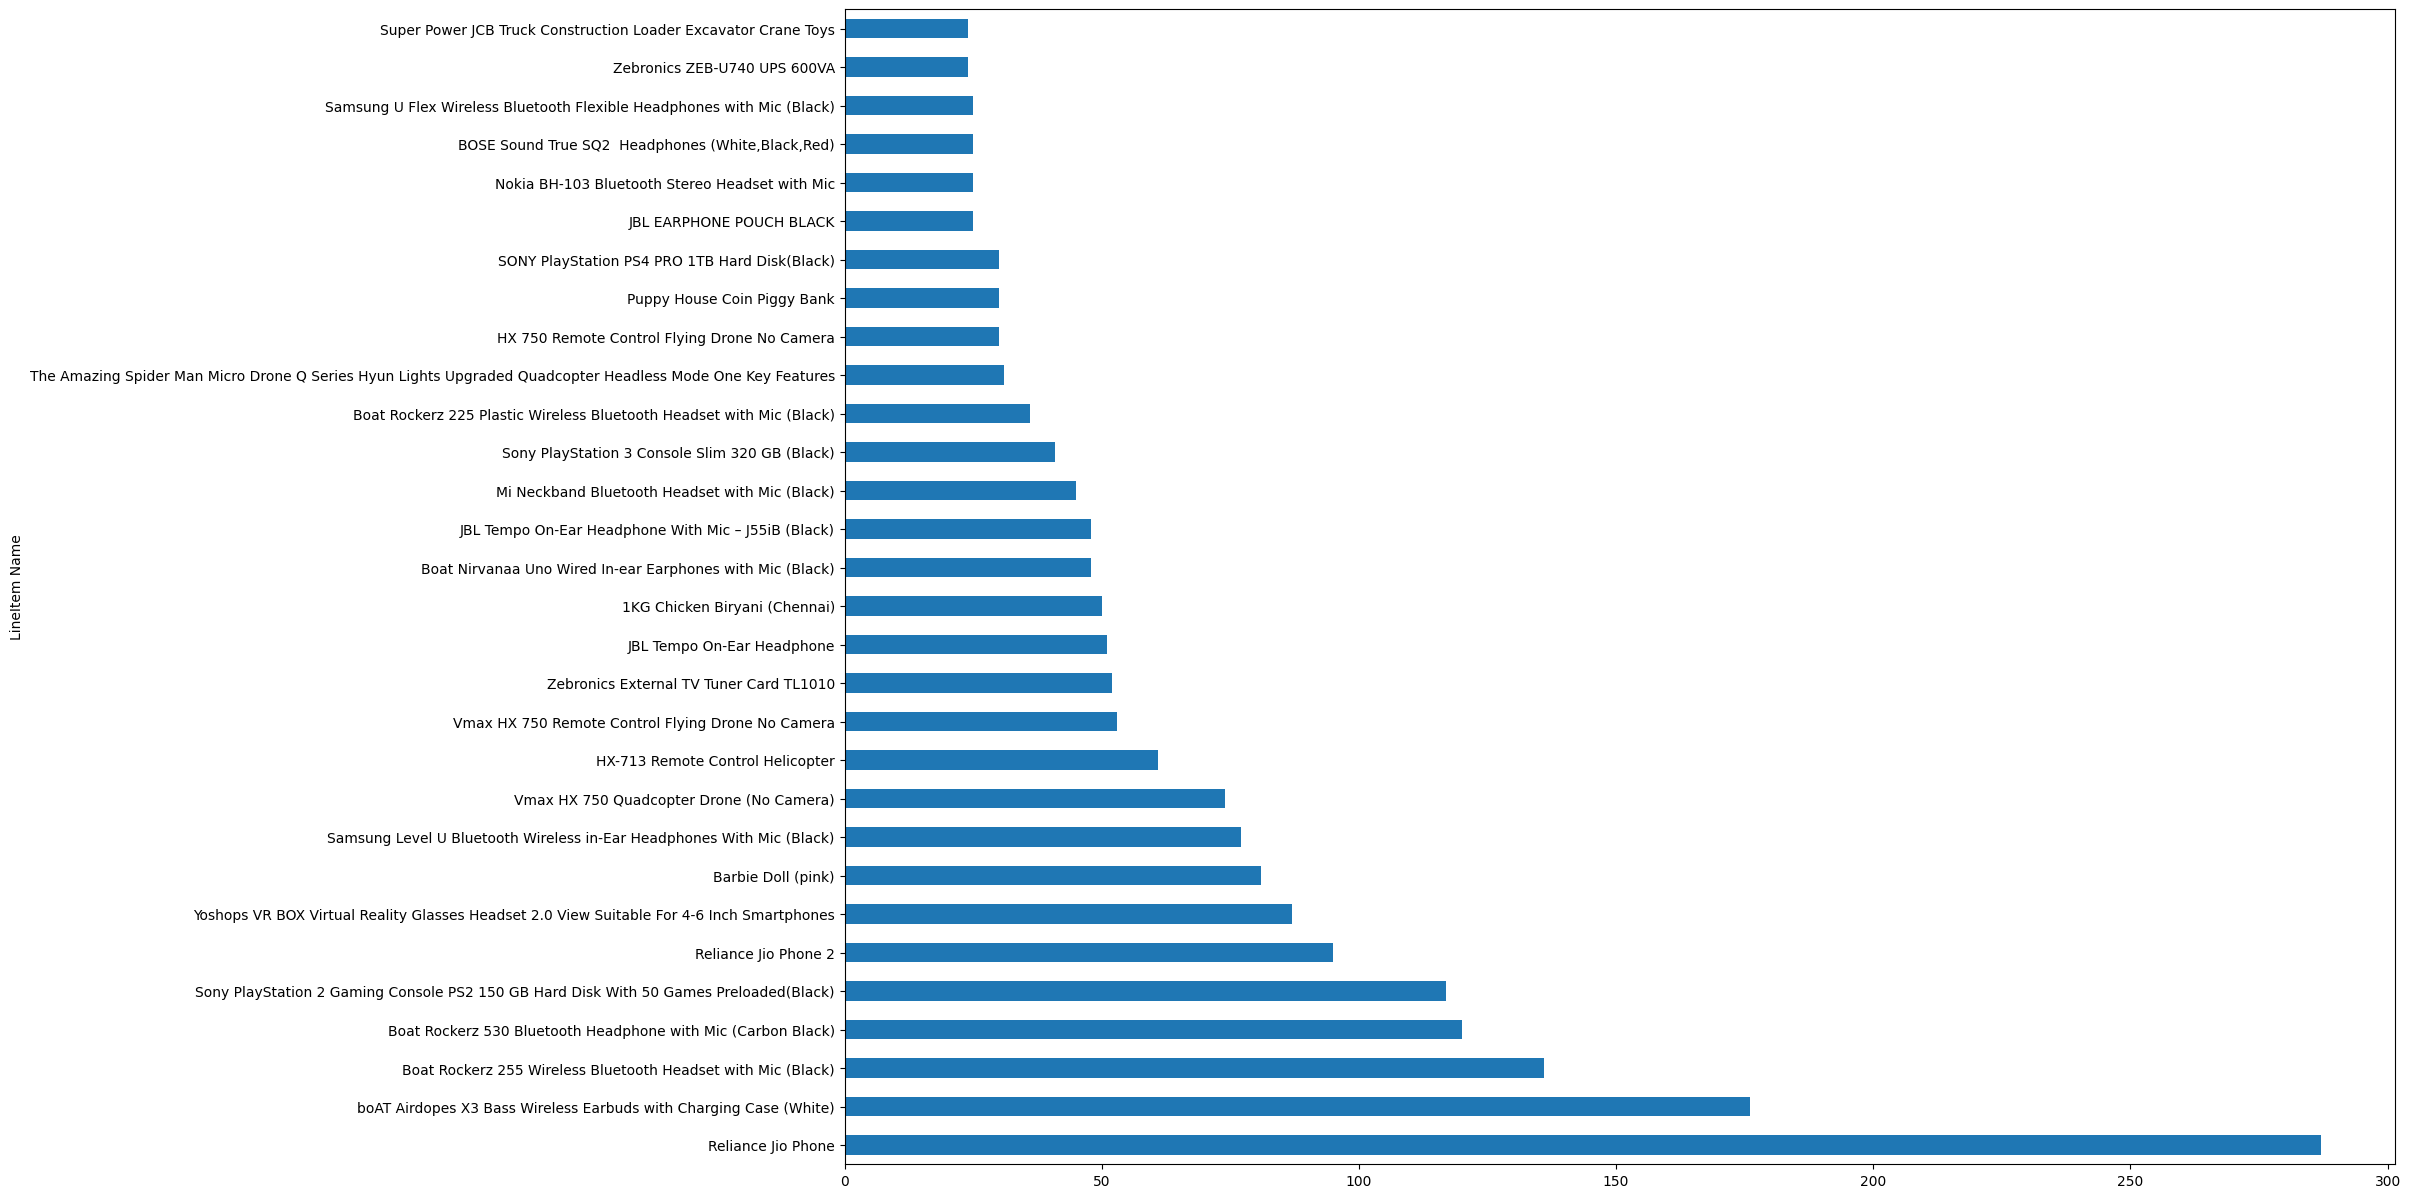

In [34]:
df['LineItem Name'].value_counts().iloc[:30].plot(kind='barh',figsize=(20,15))

<Axes: ylabel='count'>

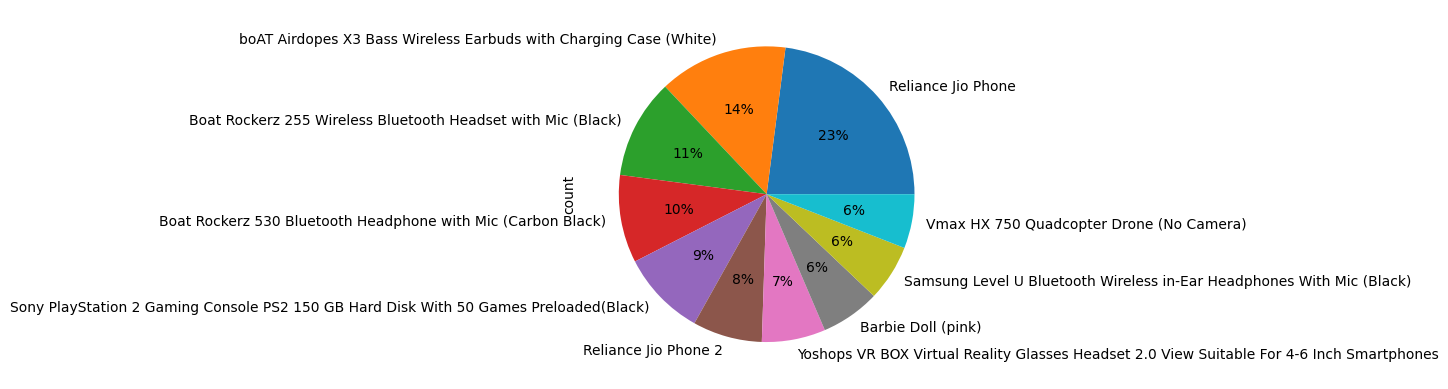

In [36]:
df['LineItem Name'].value_counts().iloc[:10].plot(kind='pie',autopct='%.0f%%')

In [ ]:
# Create CSV file for multiple order
df_mul_ord.to_csv('multipleorder.csv')

## 3.Unusually large orders.

In [33]:
# Create new column large order by modified "Total" column 
df['large order'] = df['Total'].str.split(pat ='₹').str[1]

In [63]:
# Convert string into float of column values
df['large order'] = df['large order'].str.strip().str.replace(",", "").astype(float)

In [67]:
# new dataframe for large order
list_of_unusual_large_orde = df[df['large order'] > 20000]
list_of_unusual_large_orde

,Order #,Fulfillment Date and Time Stamp,Currency,Subtotal,Shipping Method,Shipping Cost,Tax Method,Taxes,Total,Coupon Code,...,Special Instructions,LineItem Name,LineItem SKU,LineItem Options,LineItem Add-ons,LineItem Qty,LineItem Sale Price,Download Status,LineItem Type,large order
84,R915143888,NaN,INR,"₹ 31,999.00",Ships Free,₹ 0.00,NaN,₹ 0.00,"₹ 31,999.00",NaN,...,NaN,SONY PlayStation PS4 PRO 1TB Hard Disk(Black),PL098433223,NaN,NaN,1,"₹ 31,999.00",NaN,physical,31999.0
91,R378334409,NaN,INR,"₹ 31,999.00",Ships Free,₹ 0.00,NaN,₹ 0.00,"₹ 31,999.00",NaN,...,NaN,SONY PlayStation PS4 PRO 1TB Hard Disk(Black),PL098433223,NaN,NaN,1,"₹ 31,999.00",NaN,physical,31999.0
98,R731855975,NaN,INR,"₹ 31,999.00",Ships Free,₹ 0.00,NaN,₹ 0.00,"₹ 31,999.00",NaN,...,NaN,SONY PlayStation PS4 PRO 1TB Hard Disk(Black),PL098433223,NaN,NaN,1,"₹ 31,999.00",NaN,physical,31999.0
130,R790458895,NaN,INR,"₹ 31,999.00",Ships Free,₹ 0.00,NaN,₹ 0.00,"₹ 31,999.00",NaN,...,NaN,SONY PlayStation PS4 PRO 1TB Hard Disk(Black),PL098433223,NaN,NaN,1,"₹ 31,999.00",NaN,physical,31999.0
154,R969952776,NaN,INR,"₹ 31,999.00",Ships Free,₹ 0.00,NaN,₹ 0.00,"₹ 31,999.00",NaN,...,NaN,SONY PlayStation PS4 PRO 1TB Hard Disk(Black),PL098433223,NaN,NaN,1,"₹ 31,999.00",NaN,physical,31999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3003,R121638056,NaN,INR,"₹ 9,49,050.00",Ships Free,₹ 0.00,NaN,₹ 0.00,"₹ 9,49,050.00",NaN,...,NaN,AmbranePowerBank P-1310,8,NaN,NaN,999,₹ 800.00,NaN,physical,949050.0
3005,R877373840,NaN,INR,"₹ 45,000.00",Free Shipping,₹ 0.00,NaN,₹ 0.00,"₹ 45,000.00",NaN,...,NaN,iBall Excelance CompBook 11.6-inch Laptop,13,NaN,Color:White,5,"₹ 9,000.00",NaN,physical,45000.0
3007,R659812042,NaN,INR,"₹ 49,950.00",Ships Free,₹ 0.00,NaN,₹ 0.00,"₹ 49,950.00",NaN,...,NaN,Ear Wired Earphones With Mic White,11,NaN,NaN,999,₹ 50.00,NaN,physical,49950.0
3008,R404539365,NaN,INR,"₹ 49,950.00",Ships Free,₹ 0.00,NaN,₹ 0.00,"₹ 49,950.00",NaN,...,NaN,Ear Wired Earphones With Mic White,11,NaN,NaN,999,₹ 50.00,NaN,physical,49950.0


In [68]:
# Create CSV file for Unusual orders
list_of_unusual_large_orde.to_csv('List of unusual large order.csv')

## 4.Multiple orders to the same address with different payment method.

In [64]:
# Create new Data for different payment method
colmn = ['Payment Method','Shipping Street Address']
df_diff_pay =df[colmn]
df_diff_pay['payment method']=  df_diff_pay['Payment Method'].str.split(pat='₹').str[0]
df_diff_pay

C:\Users\yatim\AppData\Local\Temp\ipykernel_12612\1598717444.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diff_pay['payment method']=  df_diff_pay['Payment Method'].str.split(pat='₹').str[0]


,Payment Method,Shipping Street Address,payment method
0,NaN,Maharashtra chandrapur ghugus,NaN
1,NaN,Maharashtra chandrapur ghugus,NaN
2,NaN,Maharashtra chandrapur ghugus,NaN
3,NaN,"Chandrapur, ghugus, indra Nagar, Rajiv colony,",NaN
4,NaN,"D-6 SIR SYED APT,FLAT NO 401,THOKAR NO 7,NEAR ...",NaN
...,...,...,...
3035,NaN,Gcc,NaN
3036,NaN,"Mayuree bihar,1st lane,near somnathnagar",NaN
3037,NaN,mayuree vihar 1st lane,NaN
3038,NaN,test,NaN


In [66]:
df_diff_pay = df_diff_pay.drop('Payment Method',axis=1)

In [67]:
# Sort total number of order by grouping shipping address and payment method
df_diff_pay = df_diff_pay.groupby(['payment method','Shipping Street Address']).size().sort_values(ascending=False).reset_index(name='Total Order')
df_diff_pay

,payment method,Shipping Street Address,Total Order
0,Offline Payment,"Kaushalya Bhavan, B37165-12",22
1,Offline Payment,"Kaushalya Bhavan, B37/165-12",14
2,CCAvenue,"H# 10-7-732/b, Opp:HP bidi factory",4
3,Offline Payment,Chandrasekar nagar extension,3
4,CCAvenue,"Pacific IT, Noida 63",3
...,...,...,...
202,Offline Payment,"22251'gali no 2,durga colony taruwala",1
203,Offline Payment,"234/22, thilagar street, annur",1
204,Offline Payment,2917,1
205,Offline Payment,"3/297,main road,ram nagar,savakkatupalayam,Ero...",1


In [173]:
# Find out same address with different payment method
df_final = df_diff_pay[df_diff_pay.duplicated('Shipping Street Address', keep=False)]

<Axes: xlabel='Total Order', ylabel='Shipping Street Address'>

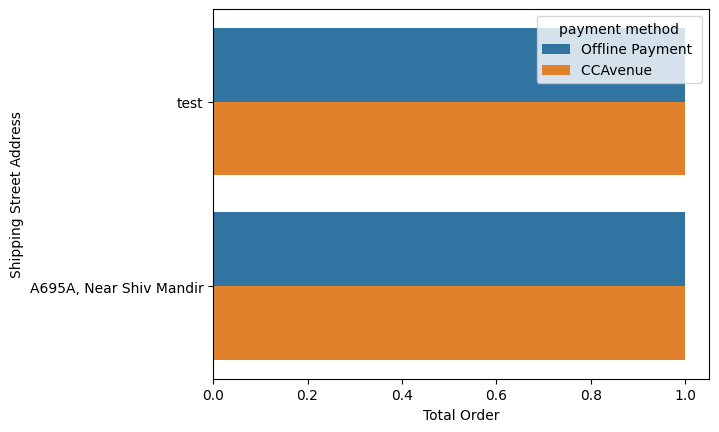

In [174]:
import seaborn as sns
sns.barplot(x=df_final['Total Order'],y=df_final['Shipping Street Address'],hue=df_final['payment method'])

In [176]:
# Create CSV file for same address with different payment method
df_final.to_csv('same address with different payment method.csv')

## 5.Unexpected international orders

In [69]:
df['Shipping Country'].value_counts()

Shipping Country
IND    3000
PRI       9
USA       5
GBR       4
PAK       3
FRA       2
MYS       2
NGA       2
CZE       1
AFG       1
CAN       1
GRD       1
SHN       1
ZAF       1
SGP       1
ARE       1
NLD       1
CHE       1
HUN       1
COL       1
GNB       1
Name: count, dtype: int64

In [71]:
# Find out Unexpected international orders
df_inter_ord = df[df['Shipping Country']!='IND']
df_inter_ord.head()

,Order #,Fulfillment Date and Time Stamp,Currency,Subtotal,Shipping Method,Shipping Cost,Tax Method,Taxes,Total,Coupon Code,...,Tracking #,Special Instructions,LineItem Name,LineItem SKU,LineItem Options,LineItem Add-ons,LineItem Qty,LineItem Sale Price,Download Status,LineItem Type
6,R711371655,NaN,INR,"₹ 2,999.00",Flat Rate,₹ 200.00,NaN,₹ 0.00,"₹ 3,199.00",NaN,...,NaN,NaN,Reliance Jio Phone 2,PL980012,NaN,NaN,1,"₹ 2,999.00",NaN,physical
39,R159642587,NaN,INR,₹ 399.00,Ships Free,₹ 0.00,NaN,₹ 0.00,₹ 399.00,NaN,...,NaN,NaN,Nova NHC-3791 Electric Hair Trimmer (Black),LP00036,NaN,NaN,1,₹ 399.00,NaN,physical
43,R046814280,NaN,INR,"₹ 1,499.00",Flat Rate,₹ 400.00,NaN,₹ 0.00,"₹ 1,899.00",NaN,...,NaN,NaN,Reliance Jio Phone,PL-JIO1,NaN,NaN,1,"₹ 1,499.00",NaN,physical
143,R537836718,NaN,INR,₹ 499.00,Ships Free,₹ 0.00,NaN,₹ 0.00,₹ 499.00,NaN,...,NaN,NaN,Men Formal Shoes Black Color With Free Sunglasses,PL765767567,Size:8,NaN,1,₹ 499.00,NaN,physical
145,R645155068,NaN,INR,"₹ 1,499.00",Flat Rate,₹ 400.00,NaN,₹ 0.00,"₹ 1,899.00",NaN,...,NaN,NaN,Reliance Jio Phone,PL-JIO1,NaN,NaN,1,"₹ 1,499.00",NaN,physical


In [72]:
# Create CSV file for Unexpected international orders
df_inter_ord.to_csv('List of unexpected international order.csv')
